In [2]:
# Código para a parte clássica, sem redução do número de características 
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.svm import SVC

wine_data = load_wine()

features = wine_data.data
labels = wine_data.target

features = MinMaxScaler().fit_transform(features) #normalização das features

# Treinamento do modelo:
algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
) 

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"SVC clássico no dataset de treinamento: {train_score_c4:.2f}")
print(f"SVC clássico no dataset de teste:     {test_score_c4:.2f}")

SVC clássico no dataset de treinamento: 1.00
SVC clássico no dataset de teste:     0.97


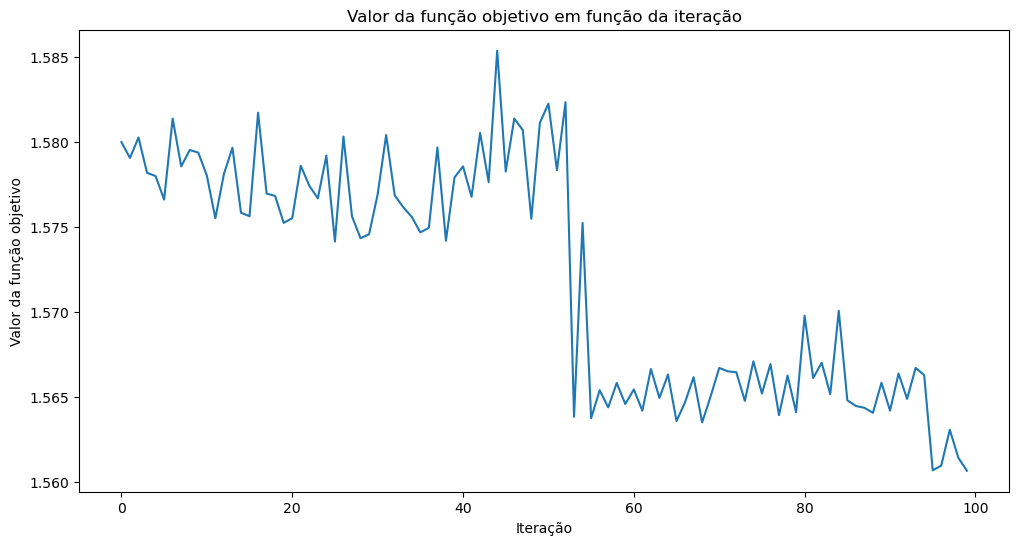

Tempo de treinamento: 7014 segundos
Quantum VQC no dataset de treinamento: 0.59
Quantum VQC no dataset de teste:     0.44


In [2]:
# Código para a parte quântica, sem redução do número de características 
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

#Decoomposição no mapa de características 
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", fold=20) #essa linha gera o gráfico


# criação do ansatz:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
#ansatz.decompose().draw(output="mpl", fold=20) #essa linha gera o gráfico

optimizer = COBYLA(maxiter=100) # escolha do algoritmo otimizador

sampler = Sampler() #definição se o treinamento ocorrerá em um computador quântico ou simulador. Nesse caso, no simulador.

#função callback: 
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Valor da função objetivo em função da iteração")
    plt.xlabel("Iteração")
    plt.ylabel("Valor da função objetivo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

#construção do classificador e teste:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Tempo de treinamento: {round(elapsed)} segundos")

#Resultados:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC no dataset de treinamento: {train_score_q4:.2f}")
print(f"Quantum VQC no dataset de teste:     {test_score_q4:.2f}")

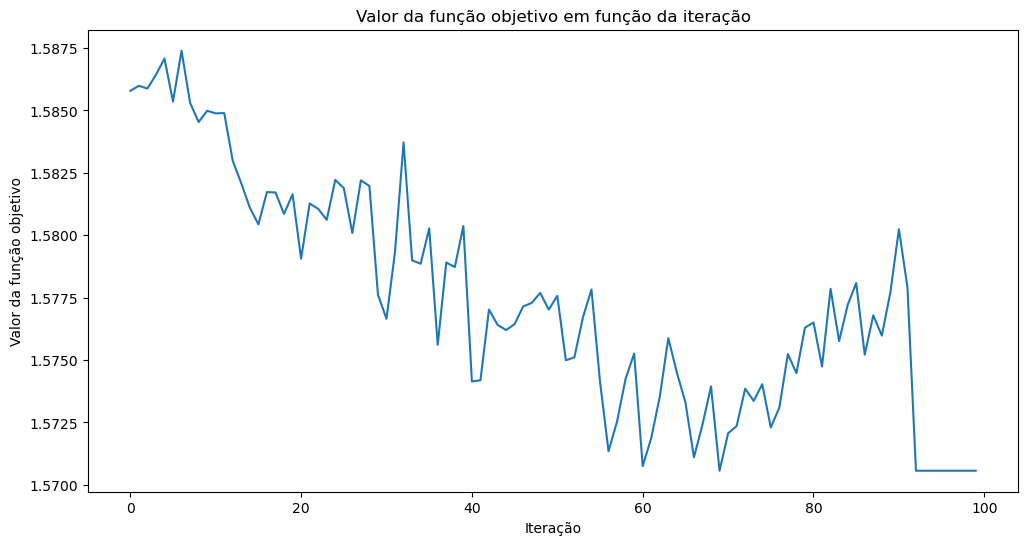

Tempo de treinamento: 7018 segundos
Quantum VQC no dataset de treinamento, Efficient2: 0.60
Quantum VQC no dataset de teste, Efficient2:     0.56


In [2]:
# Código para a parte quântica, sem redução do número de características, com EfficientSU2
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

#Decoomposição no mapa de características 
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", fold=20) #essa linha gera o gráfico


# criação do ansatz:
ansatz = EfficientSU2(num_qubits=num_features, reps=3)
#ansatz.decompose().draw(output="mpl", fold=20) #essa linha gera o gráfico

optimizer = COBYLA(maxiter=100) # escolha do algoritmo otimizador

sampler = Sampler() #definição se o treinamento ocorrerá em um computador quântico ou simulador. Nesse caso, no simulador.

#função callback: 
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Valor da função objetivo em função da iteração")
    plt.xlabel("Iteração")
    plt.ylabel("Valor da função objetivo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

#construção do classificador e teste:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Tempo de treinamento: {round(elapsed)} segundos")

#Resultados:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC no dataset de treinamento, EfficientSU2: {train_score_q4:.2f}")
print(f"Quantum VQC no dataset de teste, EfficientSU2:     {test_score_q4:.2f}")

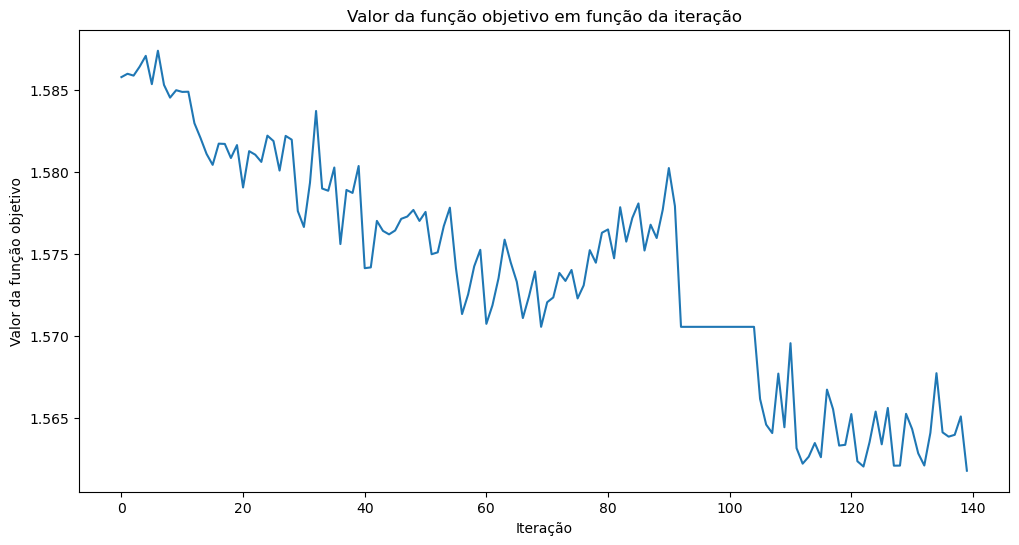

Tempo de treinamento: 9927 segundos
Quantum VQC no dataset de treinamento, EfficientSU2: 0.64
Quantum VQC no dataset de teste, EfficientSU2:     0.47


In [3]:
# Código para a parte quântica, sem redução do número de características, com EfficientSU2, mais iteracoes
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

#Decoomposição no mapa de características 
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", fold=20) #essa linha gera o gráfico


# criação do ansatz:
ansatz = EfficientSU2(num_qubits=num_features, reps=3)
#ansatz.decompose().draw(output="mpl", fold=20) #essa linha gera o gráfico

optimizer = COBYLA(maxiter=140) # escolha do algoritmo otimizador

sampler = Sampler() #definição se o treinamento ocorrerá em um computador quântico ou simulador. Nesse caso, no simulador.

#função callback: 
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Valor da função objetivo em função da iteração")
    plt.xlabel("Iteração")
    plt.ylabel("Valor da função objetivo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

#construção do classificador e teste:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Tempo de treinamento: {round(elapsed)} segundos")

#Resultados:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC no dataset de treinamento, EfficientSU2: {train_score_q4:.2f}")
print(f"Quantum VQC no dataset de teste, EfficientSU2:     {test_score_q4:.2f}")

In [3]:
## CÓDIGO PARA A PARTE CLÁSSICA, COM REDUÇÃO DO NÚMERO DE CARACTERÍSTICAS 
from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features) #aplica PCA

#treinamento e teste:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"SVC clássico no dataset de treinamento: {train_score_c2:.2f}")
print(f"SVC clássico no dataset de teste:     {test_score_c2:.2f}")


SVC clássico no dataset de treinamento: 0.99
SVC clássico no dataset de teste:     0.97


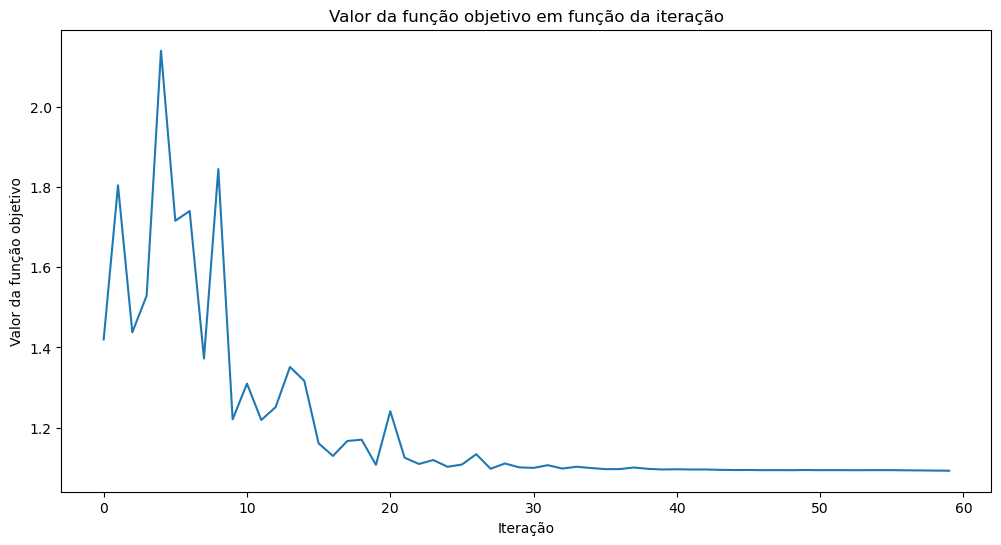

Training time: 67 seconds
Quantum VQC no dataset de treinamento utilizando RealAmplitudes: 0.50
Quantum VQC no dataset de teste utilizando RealAmplitudes:     0.39


In [12]:
## CÓDIGO PARA A PARTE QUÂNTICA, COM REDUÇÃO DO NÚMERO DE CARACTERÍSTICAS 
# recriando o mapa de características e o ansatz:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

optimizer = COBYLA(maxiter=60) #redução do número de iterações

#classificador quântico:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC no dataset de treinamento utilizando RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC no dataset de teste utilizando RealAmplitudes:     {test_score_q2_ra:.2f}")



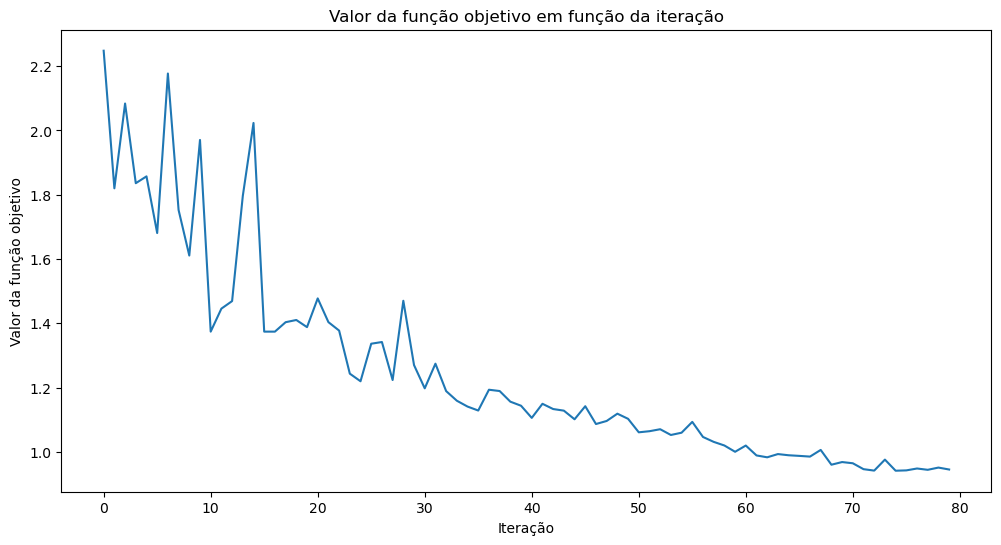

Training time: 111 seconds
Quantum VQC no dataset de treinamento utilizando EfficientSU2: 0.80
Quantum VQC no dataset de teste utilizando EfficientSU2:     0.75


In [14]:
#segundo ansatz:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=80)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

#Resultados

train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC no dataset de treinamento utilizando EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC no dataset de teste utilizando EfficientSU2:     {test_score_q2_eff:.2f}")

Conclusão

In [15]:
print(f"Model                           | Train Score | Test Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Train Score | Test Score
SVC, 4 features                 |       1.00 |       0.97
VQC, 4 features, RealAmplitudes |       0.59 |       0.44
----------------------------------------------------------
SVC, 2 features                 |       0.99 |       0.97
VQC, 2 features, RealAmplitudes |       0.50 |       0.39
VQC, 2 features, EfficientSU2   |       0.80 |       0.75
